In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("/content/Dataset.csv")

In [6]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
data.shape

(614, 13)

In [8]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

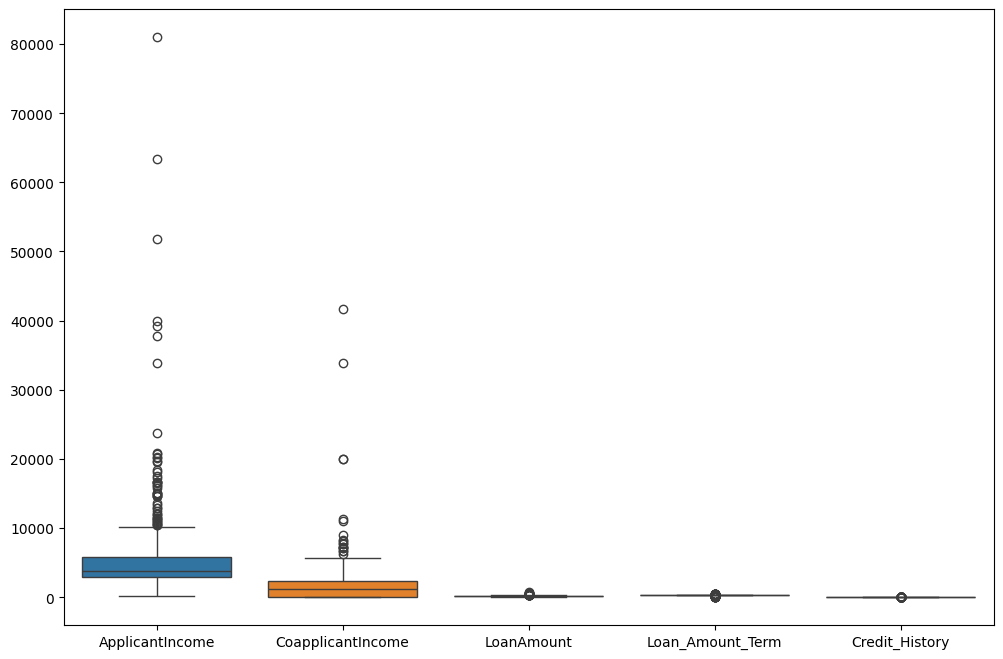

In [ ]:
# checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [ ]:
# fill the null values of numerical datatype
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].median())
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median())
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].median())

In [12]:
# fill the null values for categorical column
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [ ]:
data.duplicated().any()

np.False_

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

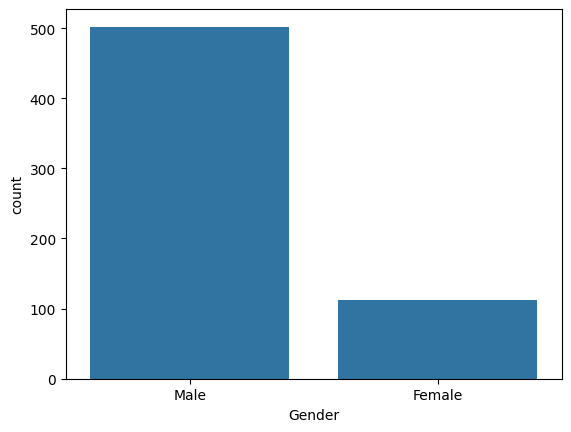

In [13]:
print("number of people who took loan by gender")
print(data["Gender"].value_counts())
sns.countplot(x="Gender",data=data)

number of people who took loan by marital_status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

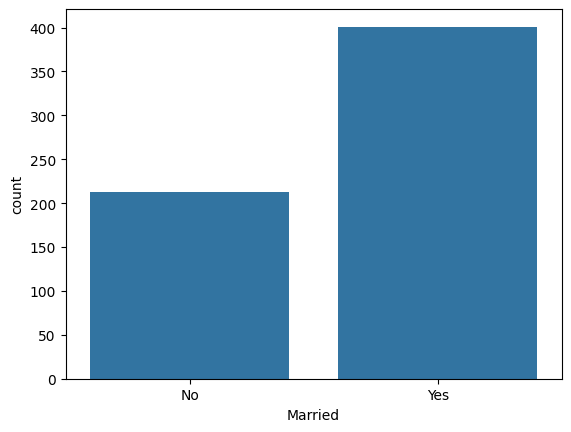

In [14]:
print("number of people who took loan by marital_status")
print(data["Married"].value_counts())
sns.countplot(x="Married",data=data)

no of people who took loan by education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


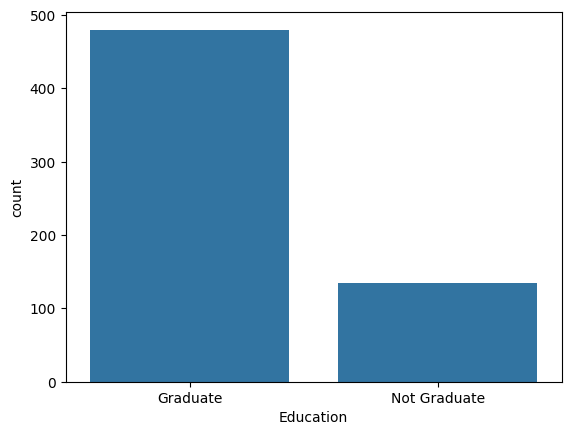

In [15]:
print("no of people who took loan by education")
print(data["Education"].value_counts())
print(sns.countplot(x="Education",data=data))

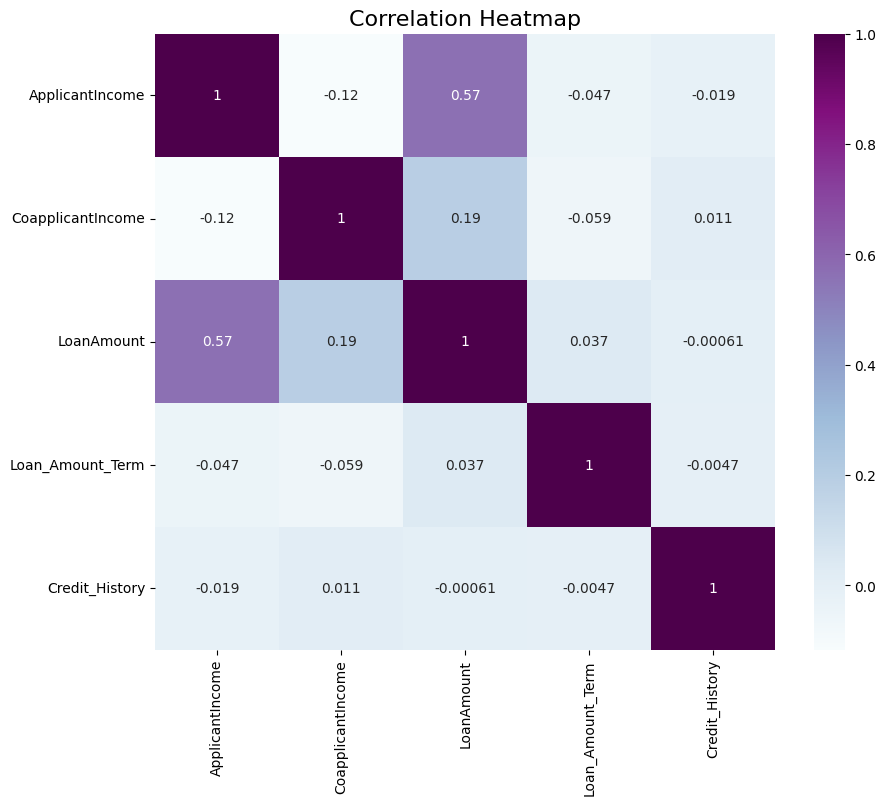

In [16]:
corr = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='BuPu')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# Total Applicant Income
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [ ]:
##  apply log transformation

In [18]:
data["ApplicantIncomelog"]=np.log(data["ApplicantIncome"]+1)

In [19]:
sns.distplot(data["ApplicantIncomelog"])

/tmp/ipython-input-648732345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncomelog"])


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

In [21]:
data["LoanAmountlog"]=np.log(data["LoanAmount"]+1)

In [20]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomelog'],
      dtype='object')

/tmp/ipython-input-2421287783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncomelog"])


<Axes: xlabel='CoapplicantIncomelog', ylabel='Density'>

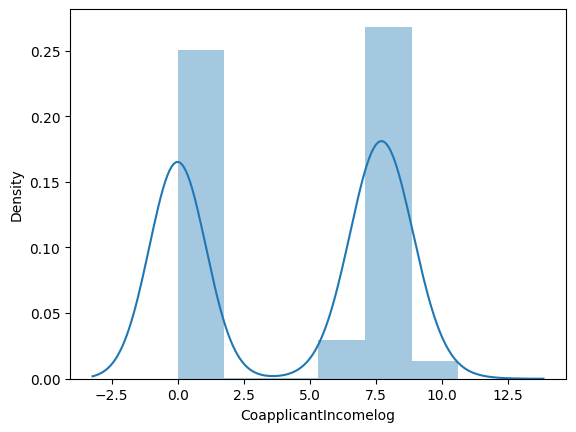

In [24]:
data["CoapplicantIncomelog"]=np.log(data["CoapplicantIncome"]+1)
sns.distplot(data["CoapplicantIncomelog"])

/tmp/ipython-input-3253553143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["LoanAmountlog"])


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

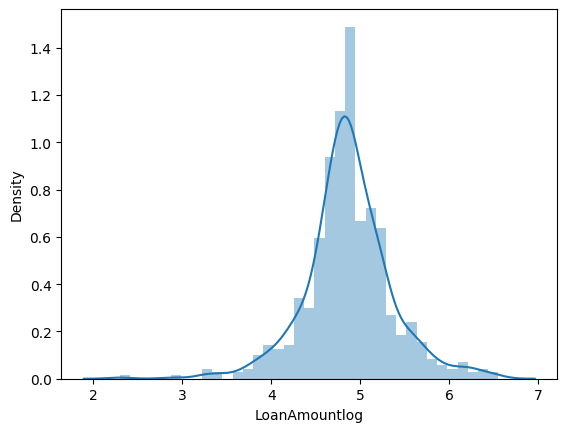

In [25]:
sns.distplot(data["LoanAmountlog"])

/tmp/ipython-input-2927655346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Loan_Amount_Term"])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

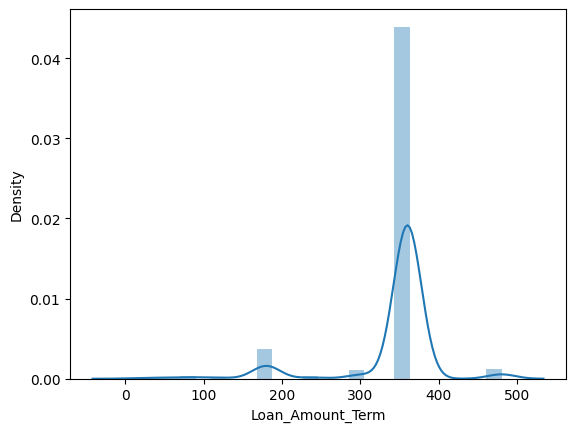

In [27]:
data["Loan_Amount_Termlog"]=np.log(data["Loan_Amount_Term"]+1)
sns.distplot(data["Loan_Amount_Term"])

/tmp/ipython-input-19867854.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Total_Income"])


<Axes: xlabel='Total_Income', ylabel='Density'>

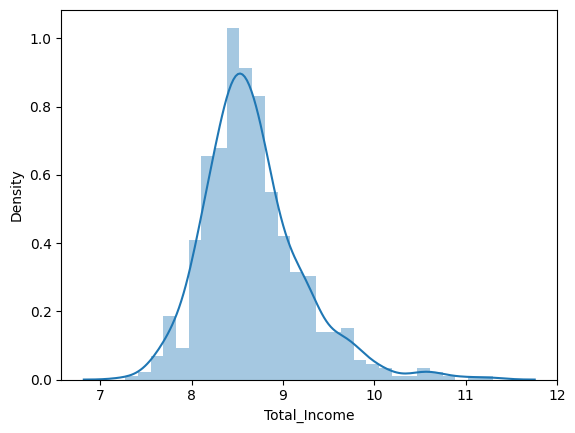

In [28]:
data["Total_Income"]=np.log(data["Total_Income"]+1)
sns.distplot(data["Total_Income"])

In [29]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  ApplicantIncomelog  \
0             1.0         Urban           Y      8.674197            8.674197   
1             1.0         Rural           N      8.714732            8.430327   
2             1.0         Urban           Y      8.006701            8.006701   
3             1.0         Urban           Y      8.505525            7.857094   
4             1.0         Urban           Y      8.699681            8.699681   

   LoanAmountlog  CoapplicantIncomelog  Loan_Amount_Termlog  
0       4.859812              0.000000             5.888878  
1       4.859812              7.319202             5.888878  
2       4.204693              0.000000             5.888878  
3       4.795791              7.765993             5.888878  
4       4.955827              0.000000             5.888878

In [30]:
# drop unnecessary columns

In [31]:
columns=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Loan_ID"]
data=data.drop(columns=columns,axis=1)

In [ ]:
# Encoding Technique: Lbel Encoding , one hot encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
cols=["Gender","Married","Education","Property_Area","Loan_Status","Dependents","Self_Employed"]
le=LabelEncoder()
for col in cols:
  data[col]=le.fit_transform(data[col])

In [34]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  Total_Income  ApplicantIncomelog  \
0              2            1      8.674197            8.674197   
1              0            0      8.714732            8.430327   
2              2            1      8.006701            8.006701   
3              2            1      8.505525            7.857094   
4              2            1      8.699681            8.699681   

   LoanAmountlog  CoapplicantIncomelog  Loan_Amount_Termlog  
0       4.859812              0.000000             5.888878  
1       4.859812              7.319202             5.888878  
2       4.204693              0.000000             5.888878  
3       4.795791              7.765993             5.888878  
4       4.955827              0.000000             5.888878

In [35]:
# creating independed feature and depended feature
X=data.drop(columns=["Loan_Status"],axis=1)
y=data["Loan_Status"]

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [46]:
model1=LogisticRegression()

In [47]:
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ACC=accuracy_score(y_test,y_pred)

In [48]:
ACC

0.7727272727272727

In [ ]:
#accuracy: the sum of the correctly predictive values to the total value

In [50]:
# decisionTreeclassifier

In [52]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred)

In [53]:
accuracy1

0.7337662337662337

In [54]:
score=cross_val_score(model2,X,y,cv=5)

In [55]:
print("cross_val_score of decision_tree:",np.mean(score)*100)

cross_val_score of decision_tree: 73.4519525523124


In [56]:
## random_forest_classifier

In [57]:
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
Accuracy2=accuracy_score(y_test,y_pred)

In [58]:
Accuracy2

0.7597402597402597